In [1]:
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
RECEPTION_POWER_PATH = os.path.join(os.getcwd(), 'data', 'origin', 'receptionPower.csv')
MIN_SNIR_PATH = os.path.join(os.getcwd(), 'data', 'origin', 'minSnir.csv')
BIT_ERROR_RATE_PATH = os.path.join(os.getcwd(), 'data', 'origin', 'bitErrorRate.csv')
PACKET_ERROR_RATE_PATH = os.path.join(os.getcwd(), 'data', 'origin', 'packetErrorRate.csv')
RCVD_PK_SEQ_NO_PATH = os.path.join(os.getcwd(), 'data', 'origin', 'rcvdPkSeqNo.csv')

In [3]:
def Vt_to_dBm(Vt):
    return 10 * math.log10(Vt * 1000)


def times_to_dB(times):
    return 10 * math.log10(times)

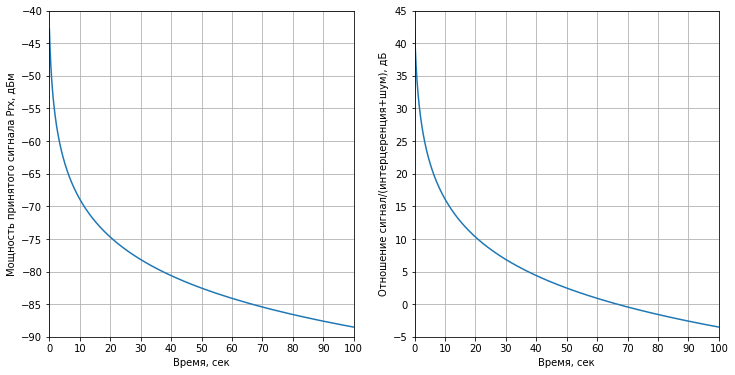

In [4]:
reception_power_df = pd.read_csv(RECEPTION_POWER_PATH, header=None)
times_1 = reception_power_df[0].tolist()
reception_powers = reception_power_df[1].tolist()
reception_powers = [Vt_to_dBm(i) for i in reception_powers]

min_Snir_df = pd.read_csv(MIN_SNIR_PATH, header=None)
times_2 = min_Snir_df[0].tolist()
Snirs = min_Snir_df[1].tolist()
Snirs = [times_to_dB(i) for i in Snirs]


x_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y_ticks_1 = [-40, -45, -50, -55, -60, -65, -70, -75, -80, -85, -90]
y_ticks_2 = [45, 40, 35, 30, 25, 20, 15, 10, 5, 0, -5]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(times_1, reception_powers)
axes[0].grid(True)
axes[0].set_xlim(0, 100)
axes[0].set_ylim(-90, -40)
axes[0].set_xticks(x_ticks)
axes[0].set_yticks(y_ticks_1)
axes[0].set_xlabel('Время, сек')
axes[0].set_ylabel('Мощность принятого сигнала Prx, дБм')

axes[1].plot(times_2, Snirs)
axes[1].grid(True)
axes[1].set_xlim(0, 100)
axes[1].set_ylim(-5, 45)
axes[1].set_xticks(x_ticks)
axes[1].set_yticks(y_ticks_2)
axes[1].set_xlabel('Время, сек')
axes[1].set_ylabel('Отношение сигнал/(интерцеренция+шум), дБ')

plt.show()

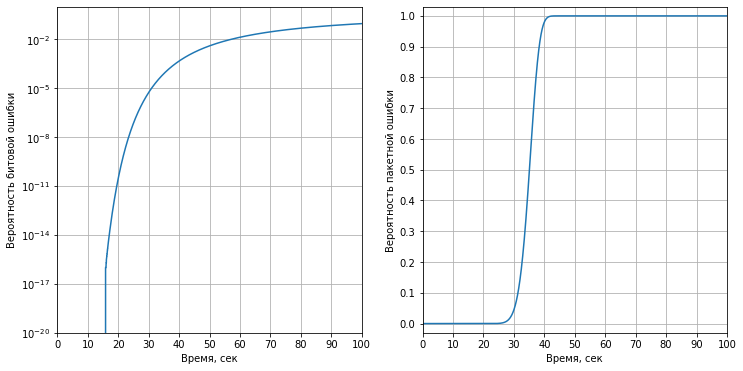

In [5]:
bit_error_rate_df = pd.read_csv(BIT_ERROR_RATE_PATH, header=None)
times_1 = bit_error_rate_df[0]
bit_error_rates = bit_error_rate_df[1]

packet_error_rate_df = pd.read_csv(PACKET_ERROR_RATE_PATH, header=None)
times_2 = packet_error_rate_df[0]
packer_error_rates = packet_error_rate_df[1]

x_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y_ticks_2 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(times_1, bit_error_rates)
axes[0].grid(True)
axes[0].set_xlim(0, 100)
axes[0].set_ylim(1e-20, 1e0)
axes[0].set_xticks(x_ticks)
axes[0].set_yscale('log')
axes[0].set_xlabel('Время, сек')
axes[0].set_ylabel('Вероятность битовой ошибки')

axes[1].plot(times_2, packer_error_rates)
axes[1].grid(True)
axes[1].set_xlim(0, 100)
axes[1].set_ylim(-0.03, 1.03)
axes[1].set_xticks(x_ticks)
axes[1].set_yticks(y_ticks_2)
axes[1].set_xlabel('Время, сек')
axes[1].set_ylabel('Вероятность пакетной ошибки')

plt.show()

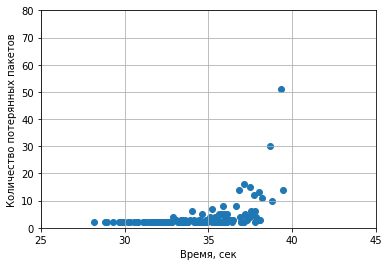

In [6]:
recived_packet_seq_no_df = pd.read_csv(RCVD_PK_SEQ_NO_PATH, header=None)
times = recived_packet_seq_no_df[0]
packet_ids = recived_packet_seq_no_df[1]

new_times = []
numbers_of_lost_packets = []
for i in range(1, len(packet_ids) - 2):
    number_of_lost_packets = packet_ids[i] - packet_ids[i - 1]
    if number_of_lost_packets != 1:
        new_times.append(times[i])
        numbers_of_lost_packets.append(number_of_lost_packets)

x_ticks = [25, 30, 35, 40, 45]
y_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80]

ax = plt.subplot()
ax.scatter(new_times, numbers_of_lost_packets)
ax.grid(True)
ax.set_xlim(25, 45)
ax.set_ylim(0, 80)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlabel('Время, сек')
ax.set_ylabel('Количество потерянных пакетов')

plt.show()